In [138]:
import numpy as np
import matplotlib.pyplot as plt
with open("out.bin", "rb") as file:
    data = np.frombuffer(file.read(), dtype = "float32")
    data = data.reshape(256, 256, -1)

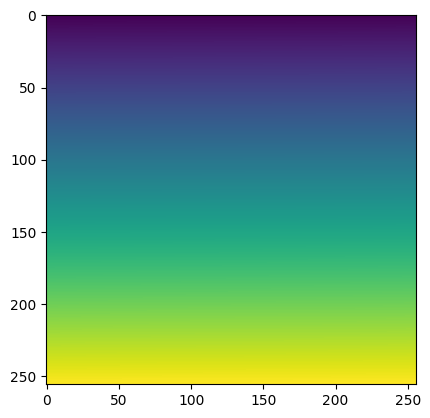

In [142]:
from scipy import fft

plt.imshow(data[:, :, 0])

In [152]:
np.abs(fft.fft2(data[:, :, 0]))

array([[2.1474509e+09, 2.6702438e+06, 1.3352225e+06, ..., 8.9026000e+05,
        1.3352225e+06, 2.6702438e+06],
       [6.8358246e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.4181693e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.2790658e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.4181693e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.8358246e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

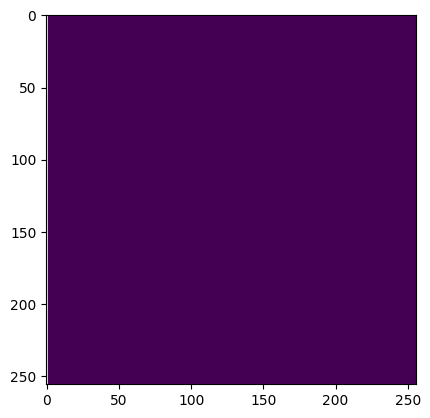

In [151]:
plt.imshow(np.abs(fft.fft2(data[:, :, 0])), vmin = 0, vmax = 1)

In [47]:
data[1, :, 0]

array([256., 257., 258., 259., 260., 261., 262., 263., 264., 265., 266.,
       267., 268., 269., 270., 271., 272., 273., 274., 275., 276., 277.,
       278., 279., 280., 281., 282., 283., 284., 285., 286., 287., 288.,
       289., 290., 291., 292., 293., 294., 295., 296., 297., 298., 299.,
       300., 301., 302., 303., 304., 305., 306., 307., 308., 309., 310.,
       311., 312., 313., 314., 315., 316., 317., 318., 319., 320., 321.,
       322., 323., 324., 325., 326., 327., 328., 329., 330., 331., 332.,
       333., 334., 335., 336., 337., 338., 339., 340., 341., 342., 343.,
       344., 345., 346., 347., 348., 349., 350., 351., 352., 353., 354.,
       355., 356., 357., 358., 359., 360., 361., 362., 363., 364., 365.,
       366., 367., 368., 369., 370., 371., 372., 373., 374., 375., 376.,
       377., 378., 379., 380., 381., 382., 383., 384., 385., 386., 387.,
       388., 389., 390., 391., 392., 393., 394., 395., 396., 397., 398.,
       399., 400., 401., 402., 403., 404., 405., 40